1.[Hypothesis Tests](#sec1)<br>
  &emsp;&emsp;1.1 [Normality Test](#sec1.1)<br>
  &emsp;&emsp;1.2 [Correlation Test](#sec1.2)<br>
  &emsp;&emsp;&emsp;&emsp;1.2.1 [parametric method](#sec1.2.1)<br>
  &emsp;&emsp;&emsp;&emsp;1.2.2 [NonParametric method](#sec1.2.2)<br>
  &emsp;&emsp;1.3 [Parametric Statistical Hypothesis Tests](#sec1.3)<br>
  &emsp;&emsp;&emsp;&emsp;1.3.1 [UnPaired Student’s t-Test](#sec1.3.1)<br>
  &emsp;&emsp;&emsp;&emsp;1.3.2 [UnPaired Student’s t-Test from scratch](#sec1.3.2)<br>
  &emsp;&emsp;&emsp;&emsp;1.3.3 [Paired Student’s t-Test](#sec1.3.3)<br>
  &emsp;&emsp;&emsp;&emsp;1.3.4 [Paired Student’s t-Test from scratch](#sec1.3.4)<br>
  &emsp;&emsp;&emsp;&emsp;1.3.5 [ANOVA](#sec1.3.5)<br>
  &emsp;&emsp;1.4 [NonParametric Statistical Hypothesis Tests](#sec1.4)<br>
2.[Distribution](#sec2)<br>
  &emsp;&emsp;2.1 [Uniform](#sec2.1)<br>
  &emsp;&emsp;2.2 [Normal](#sec2.2)<br>
  &emsp;&emsp;2.3 [Bernouli](#sec2.3)<br>
  &emsp;&emsp;2.4 [Binomial](#sec2.4)<br>
  &emsp;&emsp;2.5 [Poisson](#sec2.5)<br>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from scipy.stats import binom
from scipy.stats import bernoulli
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import poisson
from scipy.stats import sem
import scipy

# <a id='sec1'>Hypothesis Tests</a>

**1) Normality test**

In [ ]:
#genrate test dataset
np.random.seed(1)
data =  5 * np.random.randn(100) + 50
np.mean(data) , np.std(data)

Visual Normality Checks

In [ ]:
#HIST PLOT
plt.hist(data)
plt.show()

In [ ]:
#QQ PLOT
#https://www.youtube.com/watch?v=okjYjClSjOg
qqplot(data,line='s')#line='s' means standarrized line to match
plt.show()

QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

Statistical Normality Tests


In [ ]:
# H0 - sample was drawn from a Gaussian distribution
# H1 - sample was not 
# p <= alpha: reject H0, not normal.
# p > alpha: fail to reject H0, normal.

In [ ]:
#Shapiro-Wilk Test
    #suitable for smaller samples of data, e.g. thousands of observations or fewer
#TEST STATASTIC -> how far a sample estimate is from what we expected if H0 is true
from scipy.stats import shapiro

test_stat , p = shapiro(data)
print("test staistic",test_stat),print("p_value",p)
alpha = 0.05
if p <=alpha:print("reject H0")
else:print("fail to reject H0")

In [ ]:
#D’Agostino’s K^2 Test
from scipy.stats import normaltest
test_stat , p = normaltest(data) #test_stat = s^2 + k^2 where s=skew and k=Kurtosis
print("test staistic",test_stat),print("p_value",p)
alpha = 0.05
if p <=alpha:print("reject H0")
else:print("fail to reject H0")

In [ ]:
#Anderson-Darling Test
from scipy.stats import anderson
result = anderson(data,dist='norm')
print("test statistic",result.statistic)
print("sl","  | ","cv")
for i in range(len(result.critical_values)):
    sl,cv = result.significance_level[i],result.critical_values[i]
    if result.statistic < cv:
        print(sl,"|",cv,"fail to reject H0")
    else:
        print(sl,cv,"reject H0")

#PMF(discrete variable)
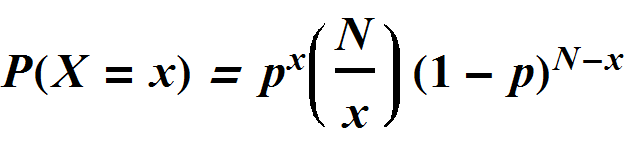

In [ ]:
#PMF(discrete variable)
n=10
p=0.5
#X = np.arange(binom.ppf(0.01,n,p),binom.ppf(0.99,n,p))
X=range(11)
plt.plot(X,binom.pmf(X, n, p),'bo',ms=8,label='binom pmf')
plt.vlines(X,0,binom.pmf(X,n,p),colors='b', lw=5, alpha=0.5)
plt.legend()
plt.show()

#PDF(continous variable)
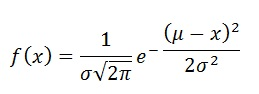

In [ ]:
#x = np.arange(norm.ppf(0.01),norm.ppf(0.99),0.01)
x = np.linspace(3,-3,100)
plt.plot(x,norm.pdf(x),'r-')
r = norm.rvs(size=1000)
plt.hist(r,density=True,histtype='stepfilled', alpha=0.2)
plt.show()

In [ ]:
# For one reason because we made the assumption that the [-3,3] interval fits well to describe
#the normal distribution (and we were right!).But what if we don't really know 
#the practical limits of the x values for a specific distribution
#for any distribution the ppf() function returns a x value that corresponds to the probability that this value appears.
rv = norm(loc=0, scale=1)           # Freeze the norm distribution at mean 0 and std 1
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100) #give a value of x where cdf value is 0.0001 and 0.9999
y = norm.pdf(x)
plt.plot(x,y)
plt.show()

In [ ]:
#CDF
std=2
mean=0
x = np.linspace(-2*std+mean,2*std+mean,100)
y = norm.pdf(x,loc=mean,scale=std)
plt.plot(x, y, label='PDF')
plt.plot(x,norm.cdf(x), 'r', label='CDF')
plt.legend(loc='best')
plt.show()

# Distribution

In [ ]:
#UNIFORM DISTRIBUTION
dist = np.random.random(1000)
sns.scatterplot(data=dist)
plt.title('Scatterplot for uniform distribution')

In [ ]:
#plt.hist(dist)
sns.distplot(dist)
plt.title('uniform distribution')

**#A Binomial Distribution has a countable number of outcomes and is therefore discrete.**

In [ ]:
#Bernoulli distribution
#head 1 tail 0
p=0.6 #head with prob p=0.6
b_dist = bernoulli.rvs(p,size=1000)
df = pd.DataFrame({'value':b_dist})
df[df==0].count().value,df[df==1].count().value#no of head and no of tail

In [ ]:
df_count = df['value'].value_counts()
df_count.plot(kind='bar', rot=0)

<a id='sec2.1'>Uniform Distribution<a>

In [ ]:
#UNIFORM
uniform_d = uniform.rvs(size=100,loc=0,scale=10)
sns.distplot(uniform_d,bins=10,kde=True)
plt.xlabel('Uniform')
plt.ylabel('Frequency')

<a id='sec2.2'>Normal Distribution<a>

In [ ]:
#NORMAL
norm_d = norm.rvs(size=10000,loc=0,scale=2)
sns.distplot(norm_d,bins=50,kde=True)
plt.xlabel('Normal')
plt.ylabel('Frequency')

<a id='sec2.3'>Bernouli Distribution<a>

In [ ]:
#Bernouli
data_bern = bernoulli.rvs(size=10000,p=0.6)
ax = sns.distplot(data_bern,kde=False)
plt.xlabel('bernoulli')
plt.ylabel('Frequency')

<a id='sec2.4'>Binomial Distribution<a>

In [ ]:
#Binomial
binom_d = binom.rvs(n=10,p=0.5,size=1000)
sns.distplot(binom_d,kde=False,color='blue')
plt.xlabel('Binomal')
plt.ylabel('Frequency')

<a id='sec2.5'>Poission Distribution<a>

Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, number of users visited your website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate (mu) at which the events happen

In [ ]:
#poisson
poisson_d = poisson.rvs(mu=3,size=10000)
sns.distplot(poisson_d,kde=False,label='rate=3')
plt.xlabel('Possion')
plt.ylabel('Frequency')
plt.legend()

# Summary Statistics

In [ ]:
norm_data = pd.DataFrame({'Value':norm_d})
print(norm_data.describe())
print()
print('Mean',norm_d.mean())
print('var',norm_d.var())
print('std',norm_d.std())
print('Skewness',norm_data['Value'].skew())
print('Kurtosis',norm_data['Value'].kurtosis())

Standard Error (SE) measures how spread the distribution is from the sample mean.
The formula can also be defined as the standard deviation divided by the square root of the number of samples

In [ ]:
print('Standard error of uniform sample',sem(uniform_d))
print('Standard error of norm sample',sem(norm_d))
print('Standard error of binomial sample',sem(binom_d))

# <a id='sec1.2'>Correlation Test</a>

<a id='sec1.2.1'>parametric method</a>

In [ ]:
np.random.seed(1)
data1 =  20 * np.random.randn(1000) + 100 #100 mean and 20 std
data2 = data1 + 10 * np.random.randn(1000) + 50
print('data1-> mean: ',data1.mean(),',std: ',data1.std())
print('data2-> mean: ',data2.mean(),',std: ',data2.std())

In [ ]:
sns.scatterplot(data1,data2)

In [ ]:
#covariance matrix
#cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y))) * 1/(n-1)
np.cov(data1,data2)
# positive corelate two variable -> 389.7545618
#Problem -> hard to interprate

In [ ]:
#Pearson correlation coefficient
#normalization of the covariance between the two variables to give an interpretable score
#Pearson's correlation coefficient = cov(X, Y) / (stdv(X) * stdv(Y))
cor , _ =scipy.stats.pearsonr(data1,data2)
cor

<a id='sec1.2.2'>NonParametric method</a>

In [ ]:
#Spearman’s correlation coefficient
#measure nonlinear relationship and variable may not have gaussian distribution
#Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

In [ ]:
np.random.seed(1)
data1 = np.random.rand(1000)*20#not normal distribution
data2 = data1 + (np.random.rand(1000)*10)
#data2 =(np.random.rand(1000)*10) check for both data2 one by one
sns.scatterplot(data1,data2)

In [ ]:
# calculate spearman's correlation
coef, p = scipy.stats.spearmanr(data1, data2)
print("coef",coef)

alpha=0.05
if p>alpha:
    print("uncorelated(Failed to reject H0) with confidence",int((1-p)*100))
else:
    print("corelated(reject H0) with confidence",int((1-p)*100))


In [ ]:
#Kendall’s correlation
# it calculates a normalized score for the number of matching or concordant rankings between the two samples

coef , p = scipy.stats.kendalltau(data1,data2)
print("coef",coef)

alpha=0.05
if p>alpha:
    print("uncorelated(Failed to reject H0) with confidence",int((1-p)*100))
else:
    print("corelated(reject H0) with confidence",int((1-p)*100))


# <a id='sec1.3'>Parametric Statistical Hypothesis Tests</a>

In [ ]:
# p <= alpha: reject null hypothesis, different distribution
# p > alpha: fail to reject null hypothesis, same distribution
# To test we drwan a sample from two diffrent normal distribution

In [ ]:
np.random.seed(1)
data1 = 20 * np.random.randn(1000)+50.1
data2 = 10 * np.random.randn(1000)+50
print('Data1 mean is {0} and std is {1}'.format(data1.mean(),data1.std()))
print('Data2 mean is {0} and std is {1}'.format(data2.mean(),data2.std()))

<a id='sec1.3.1'>UnPaired Student’s t-Test</a>
* The "unpaired" way would be to measure the heart rate of 10 people before drinking an energy drink and then measure the heart rate of some other group of peoplewho have drank energy drinks. These two samples consist of different test subjects, so you would perform an unpaired t-test on the means of both samples.

In [ ]:
#The Student’s t-test is a statistical hypothesis test that two independent data samples 
#known to have a Gaussian distribution, have the same Gaussian distribution
stat , p = scipy.stats.ttest_ind(data1,data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
    print("same distribution(Failed to reject H0) with confidence",int((1-p)*100))
else:
    print("diff distribution(reject H0) with confidence",int((1-p)*100))

<a id='sec1.3.2'>UnPaired(Independent) Student’s t-Test from scratch</a>

In [ ]:
np.random.seed(1)
def independent_t_test(data1,data2,alpha=0.05):
    n1=len(data1)
    n2=len(data2)
    mean_data1 = np.mean(data1)
    mean_data2 = np.mean(data2)
    se1=np.std(data1)/(n1**0.5)
    se2=np.std(data2)/(n2**0.5)
    sed=np.sqrt((se1**2)+(se2**2))
    t_stat = (mean_data1-mean_data2)/sed

    degree_fr = n1+n2-2
    critical_value = scipy.stats.t.ppf(1.0-alpha,degree_fr)
    p = (1.0-scipy.stats.t.cdf(abs(t_stat),degree_fr))*2.0
    return t_stat,critical_value,p
data1 = 20 * np.random.randn(1000)+50.1
data2 = 10 * np.random.randn(1000)+50
t_stat , cv , p = independent_t_test(data1,data2)
print('t_stat: ',t_stat,'critical value:',cv,'p value',p)
if p>alpha:
    print("same distribution(Failed to reject H0) with confidence",int((1-p)*100))
else:
    print("diff distribution(reject H0) with confidence",int((1-p)*100))

<a id='sec1.3.3'>Paired Student’s t-Test</a>
* The "paired" way would be to measure the heart rate of 10 people before they drink the energy drink and then measure the heart rate of the same 10 people after drinking the energy drink. These two samples consist of the same test subjects, so you would perform a paired t-test on the means of both samples


In [ ]:
#H0: Paired sample distributions are equal.
#H1: Paired sample distributions are not equal.
np.random.seed(1)
data1 = 10 * np.random.randn(1000) + 50.055
data2 = 20 * np.random.randn(1000) + 50
stat , p =scipy.stats.ttest_rel(data1,data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
    print("same distribution(Failed to reject H0) with confidence",int((1-p)*100))
else:
    print("diff distribution(reject H0) with confidence",int((1-p)*100))

<a id='sec1.3.3'>Paired Student’s t-Test from scratch</a>

In [ ]:
np.random.seed(1)
def dependent_t_test(data1,data2,alpha=0.05):
    n=len(data1)# number of paired samples
    mean_data1 = np.mean(data1)
    mean_data2 = np.mean(data2)
    d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
    d2 = sum([data1[i]-data2[i] for i in range(n)])
    sd=np.sqrt((d1-(d2**2)/n)/(n-1))
    sed=sd/np.sqrt(n)
    t_stat = (mean_data1-mean_data2)/sed
    degree_fr = n-1
    critical_value = scipy.stats.t.ppf(1.0-alpha,degree_fr)
    p = (1.0-scipy.stats.t.cdf(abs(t_stat),degree_fr))*2.0
    return t_stat,critical_value,p
data1 = 10 * np.random.randn(1000) + 50.055
data2 = 20 * np.random.randn(1000) + 50
alpha=0.05
t_stat,critical_value,p = dependent_t_test(data1,data2,alpha=0.05)
print('t_stat: ',t_stat,'critical value:',cv,'p value',p)
alpha=0.05
if p>alpha:
    print("same distribution(Failed to reject H0) with confidence",int((1-p)*100))
else:
    print("diff distribution(reject H0) with confidence",int((1-p)*100))

<a id='sec1.3.5'>Analysis of Variance Test</a>
* There are sometimes situations where we may have multiple independent data samples.(The population standard deviations of the groups are all equal)
* Fail to Reject H0: All sample distributions are equal.
* Reject H0: One or more sample distributions are not equal.

In [ ]:
data1 = 10 * np.random.randn(1000)+51#this is from diff normal distribution
data2 = 10 * np.random.randn(1000)+50
data3 = 10 * np.random.randn(1000)+50
stat,p = scipy.stats.f_oneway(data1,data2,data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
    print("same distribution(Failed to reject H0) with confidence",int((1-p)*100))
else:
    print("one of the distribution differ(reject H0) with confidence",int((1-p)*100))

<a id='sec1.4'>Nonparametric Statistical Hypothesis</a>
* If the data does not have the familiar Gaussian distribution, we must resort to nonparametric version of the significance tests.These tests operate in a similar manner, but are distribution free, requiring that real valued data be first transformed into rank data before the test can be performed.

In [ ]:
#Mann-Whitney U Test
#Wilcoxon Signed-Rank Test
#Kruskal-Wallis H Test
#Friedman Test